### Importing libraries and loading data

In [173]:
import numpy as np
import pandas as pd

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [177]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

### Loading data set

In [178]:
df = pd.read_csv(r"C:\Users\gugah\Desktop\Titanic-master\train.csv")
test_data = pd.read_csv(r"C:\Users\gugah\Desktop\Titanic-master\test.csv")

### Exploring Data

In [179]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Let's see how many people survived and what is the percentage**

<AxesSubplot:xlabel='Survived', ylabel='count'>

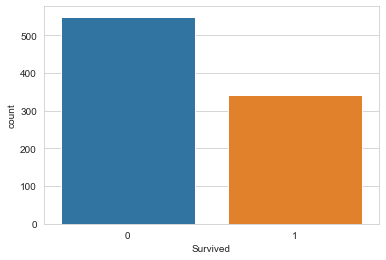

In [131]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df)

In [132]:
survived=sum(df['Survived']==1)
total=len(df['Survived'])
survived_percentage= survived / total
print ('Number of survived people is: ', survived)
print('\n')
print ('Survived Percentage is: ',survived_percentage )

Number of survived people is:  342


Survived Percentage is:  0.3838383838383838


As we see, just 38% of people survived from this disaster

**Let's look at survived - sex relation**

<AxesSubplot:xlabel='Survived', ylabel='count'>

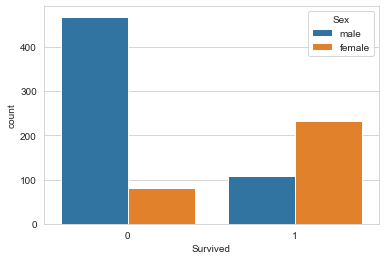

In [133]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=df)

Most of the males are doomed and survived females look like twice of the males.

**Let's see survived - class relation**

<AxesSubplot:xlabel='Survived', ylabel='count'>

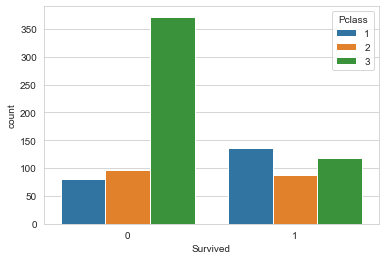

In [134]:
sns.countplot(x='Survived', hue='Pclass', data=df)

In [182]:
sns.countplot(x='Survived', hue='Title', data=df)

ValueError: Could not interpret input 'Title'

The most survivals are in first class.

### Handling with missing values

In [183]:
print (df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


There are null values on Age, Cabin and Embarked columns. We have to take care of these values before applying kNN algorithm

We will fill missing values with mean of age per class. First we will calculate mean of age for each class and then fill the null values with these means.

In [56]:
lst1=[]
lst2=[]
lst3=[]
n=len(df.Survived)
i=0
while i< n:
    if df['Pclass'][i]==1 and pd.isnull(df['Age'][i]) == False:
        lst1.append(df['Age'][i])
    elif df['Pclass'][i]==2  and pd.isnull(df['Age'][i]) == False:
        lst2.append(df['Age'][i])
    elif df['Pclass'][i]==3 and pd.isnull(df['Age'][i]) == False :
        lst3.append(df['Age'][i])
    i+=1

Mean_Pclass_1 = sum(lst1)/len(lst1)
Mean_Pclass_2 = sum(lst2)/len(lst2)
Mean_Pclass_3 = sum(lst3)/len(lst3)


def impute (col):
    Age= col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return Mean_Pclass_1
        elif Pclass ==2:
            return Mean_Pclass_2
        else:
            return Mean_Pclass_3
    else:
        return Age

# Using sautations to fill in NaN values

In [184]:
combined=df.append(test_data)

<ipython-input-184-a6ef52a05f47>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined=df.append(test_data)


In [185]:
print('Missing values Percentage: \n\n', round (combined.isnull().sum().sort_values(ascending=False)/len(combined)*100,1))

Missing values Percentage: 

 Cabin          77.5
Survived       31.9
Age            20.1
Embarked        0.2
Fare            0.1
PassengerId     0.0
Pclass          0.0
Name            0.0
Sex             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
dtype: float64


In [186]:
display(combined[(combined.Age.isnull()) & (combined.Name.str.contains('Master'))])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
65,66,1.0,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
176,177,0.0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S
709,710,1.0,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
244,1136,NaN,3,"Johnston, Master. William Arthur Willie""""",male,NaN,1,2,W./C. 6607,23.4500,NaN,S
339,1231,NaN,3,"Betros, Master. Seman",male,NaN,0,0,2622,7.2292,NaN,C
344,1236,NaN,3,"van Billiard, Master. James William",male,NaN,1,1,A/5. 851,14.5000,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [187]:
print(df[df.Name.str.contains('Master')]['Age'].mean())

4.574166666666667


In [188]:
display((combined[(combined.Age.isnull()) & (combined.Name.str.contains('Master')) & (combined.Parch==0)]))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
339,1231,NaN,3,"Betros, Master. Seman",male,NaN,0,0,2622,7.2292,NaN,C


In [189]:
test_data.loc[test_data.PassengerId==1231,'Age']=14

In [190]:
df['Title'], test_data['Title'] = [df.Name.str.extract \
        (' ([A-Za-z]+)\.', expand=False) for df in [df, test_data]]

In [191]:
df.groupby(['Title', 'Pclass'])['Age'].agg(['mean', 'count'])

mean  count
Title    Pclass                  
Capt     1       70.000000      1
Col      1       58.000000      2
Countess 1       33.000000      1
Don      1       40.000000      1
Dr       1       43.750000      4
         2       38.500000      2
Jonkheer 1       38.000000      1
Lady     1       48.000000      1
Major    1       48.500000      2
Master   1        5.306667      3
         2        2.258889      9
         3        5.350833     24
Miss     1       30.000000     45
         2       22.390625     32
         3       16.123188     69
Mlle     1       24.000000      2
Mme      1       24.000000      1
Mr       1       41.580460     87
         2       32.768293     82
         3       28.724891    229
Mrs      1       40.882353     34
         2       33.682927     41
         3       33.515152     33
Ms       2       28.000000      1
Rev      2       43.166667      6
Sir      1       49.000000      1

In [192]:
TitleDict = {"Capt": "Officer","Col": "Officer","Major": "Officer","Jonkheer": "Royalty", \
             "Don": "Royalty", "Sir" : "Royalty","Dr": "Royalty","Rev": "Royalty", \
             "Countess":"Royalty", "Mme": "Mrs", "Mlle": "Miss", "Ms": "Mrs","Mr" : "Mr", \
             "Mrs" : "Mrs","Miss" : "Miss","Master" : "Master","Lady" : "Royalty"}

In [193]:
df['Title'], test_data['Title'] = [df.Title.map(TitleDict) for df in [df, test_data]]

##Let us now reprint the groups
df.groupby(['Title', 'Pclass'])['Age'].agg(['mean', 'count'])

mean  count
Title   Pclass                  
Master  1        5.306667      3
        2        2.258889      9
        3        5.350833     24
Miss    1       29.744681     47
        2       22.390625     32
        3       16.123188     69
Mr      1       41.580460     87
        2       32.768293     82
        3       28.724891    229
Mrs     1       40.400000     35
        2       33.547619     42
        3       33.515152     33
Officer 1       56.600000      5
Royalty 1       42.555556      9
        2       42.000000      8

##### Having defined our 'Title' feature, we will perform some EDA analysis on it.

<AxesSubplot:xlabel='Survived', ylabel='count'>

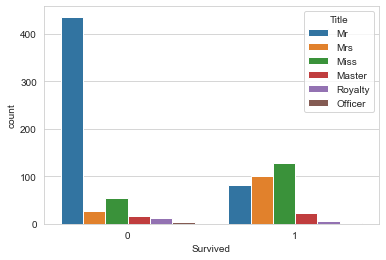

In [194]:
sns.countplot(x='Survived', hue='Title', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

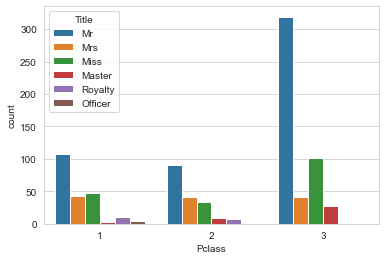

In [195]:
sns.countplot(x='Pclass', hue='Title', data=df)

<AxesSubplot:xlabel='Title', ylabel='Age'>

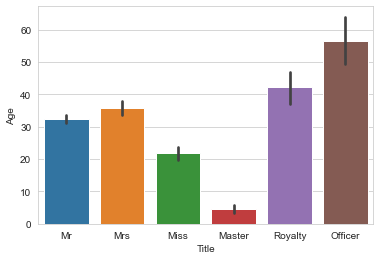

In [198]:
sns.barplot(x='Title', y='Age', data=df)

<AxesSubplot:xlabel='Title', ylabel='Fare'>

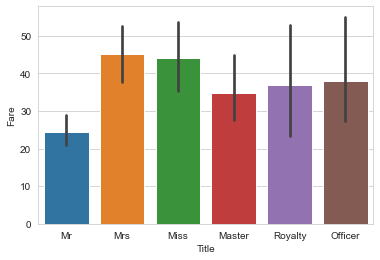

In [199]:
sns.barplot(x='Title', y='Fare', data=df)

In [201]:
combined=df.append(test_data)
display(df[df.Title.isnull()])
display(test_data[test_data.Title.isnull()])

##There is Dona which is royalty which is not covered in test_data. Update the same
test_data.at[414,'Title'] = 'Royalty'

<ipython-input-201-a87fdfa04075>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined=df.append(test_data)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


In [202]:
print ("Avg age of 'Miss' Title", round(df[df.Title=="Miss"]['Age'].mean()))

print ("Avg age of 'Miss' Title travelling without Parents", round(df[(df.Title=="Miss") & (df.Parch==0)]['Age'].mean()))

print ("Avg age of 'Miss' Title travelling with Parents", round(df[(df.Title=="Miss") & (df.Parch!=0)]['Age'].mean()), '\n')

Avg age of 'Miss' Title 22
Avg age of 'Miss' Title travelling without Parents 28
Avg age of 'Miss' Title travelling with Parents 12 



In [203]:
##Let us turn our attention to the missing fare
display(combined[combined.Fare.isnull()])

##Let us get fare per person
for df in [df, test_data, combined]:
    df['PeopleInTicket']=df['Ticket'].map(combined['Ticket'].value_counts())
    df['FarePerPerson']=df['Fare']/df['PeopleInTicket']
##Valuecounts is the swissknife of Pandas and is deeply explained in my earlier notebook

##Just take the mean fare for the PORT S and the Pclass & fill it. Remember to consider FarePerPerson and not Fare
print('Mean fare for this category: ', df[(df.Embarked=='S') & (df.Pclass==3)]['FarePerPerson'].mean())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


Mean fare for this category:  7.371602530364372


In [210]:
test_data.loc[test_data.Fare.isnull(), ['Fare','FarePerPerson']] = round(df[(df.Embarked=='S') & (df.Pclass==3) & (df.PeopleInTicket==1)]['Fare'].mean(),1)

In [211]:
display(combined[combined.Embarked.isnull()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PeopleInTicket,FarePerPerson


In [209]:
##Still port C comes out as a winner in all cases. We will go ahead with this
df.Embarked.fillna(df.Embarked.mode(), inplace=True)

          FarePerPerson       Fare  PassengerId
Embarked                                       
C             36.754695  73.509390           20
S             30.346359  60.692719           16


In [ ]:
print(df.groupby(['Pclass','Sex','Title'])['Age'].agg({'mean', 'median', 'count'}))

for df in [df, test_data, combined]:
    df.loc[(df.Title=='Miss') & (df.Parch!=0) & (df.PeopleInTicket>1), 'Title']="FemaleChild"

display(combined[(combined.Age.isnull()) & (combined.Title=='FemaleChild')])

In [212]:
##Define a group containing all the parameters you want, do a mean
##You can print the below group. This will be our lookup table
grp = df.groupby(['Pclass','Sex','Title'])['Age'].mean()
print(grp)

Pclass  Sex     Title  
1       female  Miss       30.131148
                Mrs        42.926471
                Royalty    43.333333
        male    Master      6.984000
                Mr         41.450758
                Officer    54.714286
                Royalty    43.714286
2       female  Miss       20.717083
                Mrs        33.418182
        male    Master      2.757273
                Mr         32.346715
                Royalty    40.700000
3       female  Miss       17.360874
                Mrs        32.326531
        male    Master      6.298158
                Mr         28.318910
Name: Age, dtype: float64


In [214]:
grp = df.groupby(['Pclass','Sex','Title'])['Age'].mean().reset_index()[['Sex', 'Pclass', 'Title', 'Age']]
grp

,Sex,Pclass,Title,Age
0,female,1,Miss,30.131148
1,female,1,Mrs,42.926471
2,female,1,Royalty,43.333333
3,male,1,Master,6.984000
4,male,1,Mr,41.450758
5,male,1,Officer,54.714286
6,male,1,Royalty,43.714286
7,female,2,Miss,20.717083
8,female,2,Mrs,33.418182
9,male,2,Master,2.757273


In [215]:
##Now the above lookup works perfectly. Pass it the Pclass, Sex, Title
##It can then tell you the (mean) age for that group. Let us use it

##Define a function called fill_age. This will lookup the combination
##passed to it using above lookup table and return the value of the age associated
def fill_age(x):
    return grp[(grp.Pclass==x.Pclass)&(grp.Sex==x.Sex)&(grp.Title==x.Title)]['Age'].values[0]
##Here 'x' is the row containing the missing age. We look up the row's Pclass
##Sex and Title against the lookup table as shown previously and return the Age
##Now we have to call this fill_age function for every missing row for test, train

df['Age'], test_data['Age'] = [df.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis=1) for df in [df, test_data]]
##This line is explained in the next cell

##End by combining the test and training data
combined=df.append(test_data)

<ipython-input-215-38750404e568>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined=df.append(test_data)


In [57]:
df.Age= df[['Age', 'Pclass']].apply(impute, axis=1)

In [ ]:
df.Age.fillna(df.Age.mean())

In [ ]:
df.Age.fillna(df.Age.median())

### Age Histogram

c:\Users\gugah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

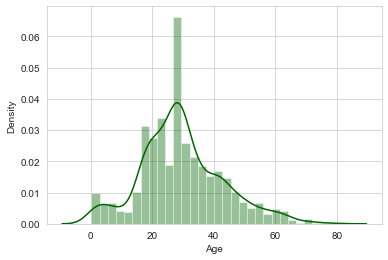

In [216]:
sns.distplot(df['Age'].dropna(),color='darkgreen',bins=30)

In [217]:
df.groupby('Pclass').agg({'Age':['min', 'max', 'count', 'mean']})

Age                       
         min   max count       mean
Pclass                             
1       0.92  80.0   323  39.454181
2       0.67  70.0   277  29.590649
3       0.17  74.0   709  24.975982

It seems creating a family size feature is a good option

In [218]:
df['family_size'] = df.SibSp + df.Parch+1

In [219]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PeopleInTicket,FarePerPerson,family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,7.25000,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,35.64165,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,7.92500,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,26.55000,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,8.05000,1


c:\Users\gugah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='family_size', ylabel='Density'>

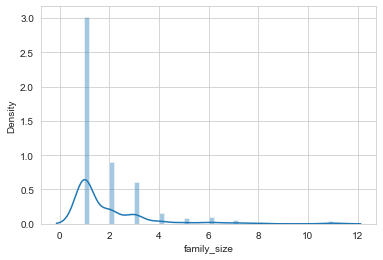

In [220]:
sns.distplot(df.family_size)

Since we do not use Cabin variable on this project we will drop it from data set

In [221]:
df.drop('Cabin', inplace=True, axis=1)

In [222]:
df.dropna(inplace=True)

# Removing outliers

## Assessing which variables need to have outliers removed

#### Obs: Data with skewness values outside the [-1,1] range is considered skewed.

c:\Users\gugah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


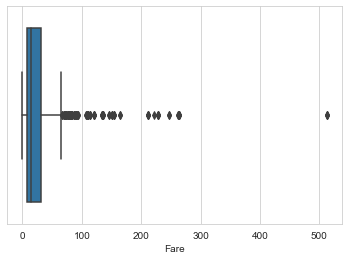

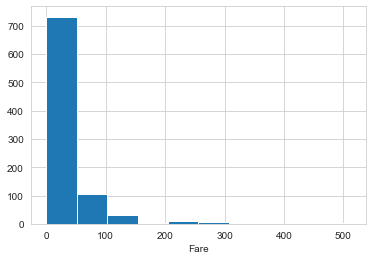

skewness value of Fare:  4.787316519674893


In [223]:
#Fare
sns.boxplot(df['Fare'])
plt.xlabel('Fare')
plt.show()

df['Fare'].hist()
plt.xlabel('Fare')
plt.show()

print('skewness value of Fare: ',df['Fare'].skew())

In [224]:
#replacing outliers with median
median = df['Fare'].median()

df['Fare'] = np.where(df['Fare'] >df['Fare'].quantile(0.75), median,df['Fare'])
df['Fare'] = np.where(df['Fare'] <df['Fare'].quantile(0.25), median,df['Fare'])

df['Fare'].describe()

count    891.000000
mean      15.567857
std        5.376221
min        7.925000
25%       14.454200
50%       14.454200
75%       14.454200
max       31.000000
Name: Fare, dtype: float64

In [225]:
#replacing outliers with standart deviation
standart_deviation = df['Fare'].std()

df['Fare'] = np.where(df['Fare'] >df['Fare'].quantile(0.75), standart_deviation,df['Fare'])
df['Fare'] = np.where(df['Fare'] <df['Fare'].quantile(0.25), standart_deviation,df['Fare'])

df['Fare'].describe()

count    891.000000
mean      11.169602
std        3.888534
min        5.376221
25%        7.925000
50%       14.454200
75%       14.454200
max       14.454200
Name: Fare, dtype: float64

In [226]:
print('skewness value of Fare: ',df['Fare'].skew())

skewness value of Fare:  -0.5590506204742323


With both the median and standart deviation values tested to fill in the removed outliers, standart deviation displayed the smallest skewness afterwards.

c:\Users\gugah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


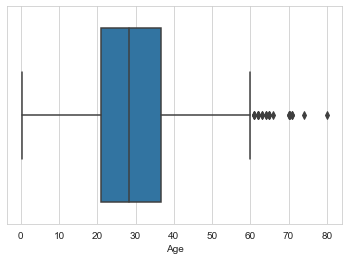

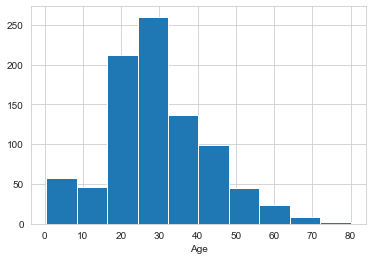

skewness value of Age:  0.4195693589466819


In [227]:
#Age
sns.boxplot(df['Age'])
plt.xlabel('Age')
plt.show()

df['Age'].hist()
plt.xlabel('Age')
plt.show()

print('skewness value of Age: ',df['Age'].skew())

c:\Users\gugah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


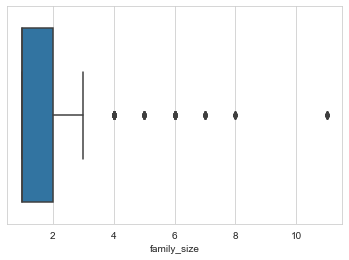

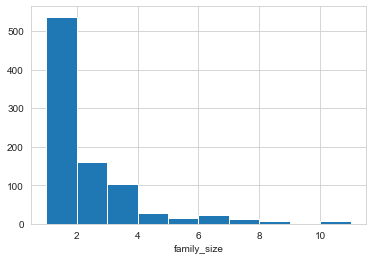

skewness value of family_size:  2.7274414739308535


In [228]:
#Family size
sns.boxplot(df['family_size'])
plt.xlabel('family_size')
plt.show()

df['family_size'].hist()
plt.xlabel('family_size')
plt.show()

print('skewness value of family_size: ',df['family_size'].skew())

In [229]:
#replacing missing outliers with standart deviation
median = df['family_size'].median()

df['family_size'] = np.where(df['family_size'] >df['family_size'].quantile(0.75), median,df['family_size'])
df['family_size'] = np.where(df['family_size'] <df['family_size'].quantile(0.25), median,df['family_size'])

df['family_size'].describe()

count    891.000000
mean       1.180696
std        0.384982
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: family_size, dtype: float64

In [157]:
df['family_size'].skew()

0

In [163]:
#replacing missing outliers with standart deviation
standart_deviation = df['family_size'].std()

df['family_size'] = np.where(df['family_size'] >df['family_size'].quantile(0.75), standart_deviation,df['family_size'])
df['family_size'] = np.where(df['family_size'] <df['family_size'].quantile(0.25), standart_deviation,df['family_size'])

df['family_size'].describe()

count    891.000000
mean       1.313577
std        0.405051
min        1.000000
25%        1.000000
50%        1.000000
75%        1.613459
max        2.000000
Name: family_size, dtype: float64

In [ ]:
#Storing skewness values in variables
Age_skew = df['Age'].skew()
Fare_skew = df['Fare'].skew()
family_size_skew = df['family_size'].skew()

So we do not have any issing values, we are good to go.

**Dummy Variables**

Since Sex and Embark columns are categorical features, we will use dummy variables instead of these ones.

In [230]:
sex=pd.get_dummies(df.Sex, drop_first=True)

In [231]:
embark=pd.get_dummies(df.Embarked, drop_first=True)

In [244]:
titles=pd.get_dummies(df.Title, drop_first=True)

In [245]:
df=pd.concat([df,sex,embark,titles], axis=1)

In [259]:
df.head()

,Survived,Pclass,Age,Fare,Title,PeopleInTicket,FarePerPerson,male,S,male,Q,S,Miss,Mr,Mrs,Officer,Royalty
0,0.0,3,22.0,14.4542,Mr,1,7.25000,1,1,1,0,1,0,1,0,0,0
1,1.0,1,38.0,14.4542,Mrs,2,35.64165,0,0,0,0,0,0,0,1,0,0
2,1.0,3,26.0,7.9250,Miss,1,7.92500,0,1,0,0,1,1,0,0,0,0
3,1.0,1,35.0,14.4542,Mrs,2,26.55000,0,1,0,0,1,0,0,1,0,0
4,0.0,3,35.0,8.0500,Mr,1,8.05000,1,1,1,0,1,0,1,0,0,0


In [247]:
df.drop(['Name', 'PassengerId', 'Sex', 'Ticket', 'Embarked', 'SibSp', 'Parch'], axis=1, inplace=True)

KeyError: "['Name' 'PassengerId' 'Sex' 'Ticket' 'Embarked' 'SibSp' 'Parch'] not found in axis"

In [260]:
df.drop(['Title'],axis=1, inplace=True)

In [248]:
df.head()

,Survived,Pclass,Age,Fare,Title,PeopleInTicket,FarePerPerson,male,S,male,Q,S,Miss,Mr,Mrs,Officer,Royalty
0,0.0,3,22.0,14.4542,Mr,1,7.25000,1,1,1,0,1,0,1,0,0,0
1,1.0,1,38.0,14.4542,Mrs,2,35.64165,0,0,0,0,0,0,0,1,0,0
2,1.0,3,26.0,7.9250,Miss,1,7.92500,0,1,0,0,1,1,0,0,0,0
3,1.0,1,35.0,14.4542,Mrs,2,26.55000,0,1,0,0,1,0,0,1,0,0
4,0.0,3,35.0,8.0500,Mr,1,8.05000,1,1,1,0,1,0,1,0,0,0


In [249]:
df.corr()

<ipython-input-249-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Survived,Pclass,Age,Fare,PeopleInTicket,FarePerPerson,male,S,male,Q,S,Miss,Mr,Mrs,Officer,Royalty
Survived,1.000000,-0.338481,-0.072418,-0.017928,0.064962,0.288337,-0.543351,-0.155660,-0.543351,0.003650,-0.155660,0.332795,-0.549199,0.344935,0.002496,-0.014912
Pclass,-0.338481,1.000000,-0.406693,-0.093910,-0.039893,-0.762981,0.131900,0.081720,0.131900,0.221009,0.081720,-0.009258,0.142698,-0.154437,-0.117649,-0.148506
Age,-0.072418,-0.406693,1.000000,0.041997,-0.239110,0.343930,0.117638,0.010060,0.117638,-0.099586,0.010060,-0.316973,0.225073,0.196354,0.151175,0.137656
Fare,-0.017928,-0.093910,0.041997,1.000000,0.065549,0.178811,0.015711,-0.135967,0.015711,0.066251,-0.135967,0.074104,0.053099,-0.107915,-0.041795,0.023525
PeopleInTicket,0.064962,-0.039893,-0.239110,0.065549,1.000000,0.054931,-0.176548,0.047390,-0.176548,-0.087495,0.047390,0.124600,-0.288334,0.099415,-0.038539,-0.049676
FarePerPerson,0.288337,-0.762981,0.343930,0.178811,0.054931,1.000000,-0.114429,-0.208642,-0.114429,-0.141560,-0.208642,0.034820,-0.095604,0.104049,0.090634,0.091094
male,-0.543351,0.131900,0.117638,0.015711,-0.176548,-0.114429,1.000000,0.125722,1.000000,-0.074115,0.125722,-0.691548,0.867334,-0.552686,0.055417,0.055831
S,-0.155660,0.081720,0.010060,-0.135967,0.047390,-0.208642,0.125722,1.000000,0.125722,-0.496624,1.000000,-0.142412,0.118482,-0.005691,0.012959,-0.035823
male,-0.543351,0.131900,0.117638,0.015711,-0.176548,-0.114429,1.000000,0.125722,1.000000,-0.074115,0.125722,-0.691548,0.867334,-0.552686,0.055417,0.055831
Q,0.003650,0.221009,-0.099586,0.066251,-0.087495,-0.141560,-0.074115,-0.496624,-0.074115,1.000000,-0.496624,0.168720,-0.078338,-0.091121,-0.023105,0.012618


#### With the intent of raising our accuracy, we will be removing the features that have the weakest correlation with the passenger's survivability.

##### Result: accuracy actually got lower, but our false positives got lower as well. Considering a false positive means someone is estimated to live when they would actually die, this may be interpreted as a betterment of our data.

In [250]:
df.drop(['Q', 'family_size'], axis=1, inplace=True)

KeyError: "['Q' 'family_size'] not found in axis"

<ipython-input-251-e84fa21d2d4b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),linewidths=5, annot=True)


<AxesSubplot:>

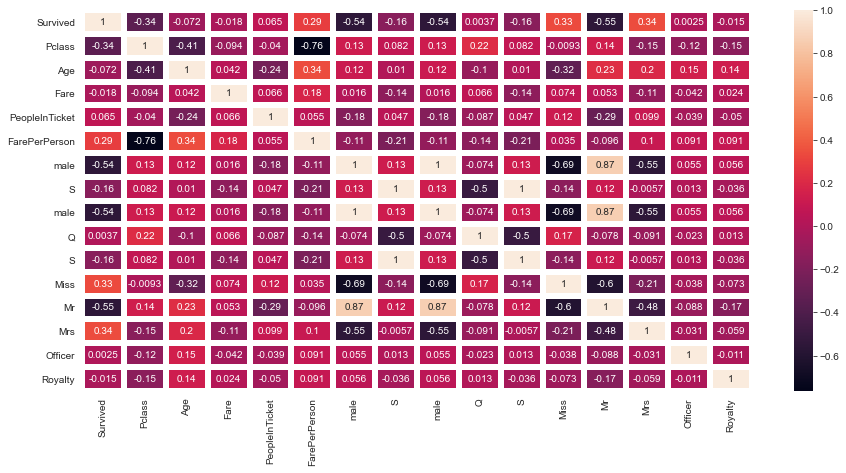

In [251]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),linewidths=5, annot=True)

We see that there is high necative correlation between Survived and males. As we saw before by plots male's survive rate was quite low, so it makes sense that males have negative correlation with survive

Besides, Pclass has negative correlation with survived. Because Pclass 3 is the lowest fare class, and this class was the crowded one, and survive rate was pretty low.

Also, Fare has negative correlation with Pclass, this is because Pclass 3 is the cheapest class.

Parch has high positive correlation with family_size. Because when we were creating family_size feature we have used Parch variable.



### Normalizing the dataset

### kNN Algorithm

In [262]:
X=df.drop('Survived', axis=1)
y=df.Survived

In [263]:
from sklearn.model_selection import train_test_split

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [265]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [266]:
kNN=KNeighborsClassifier()
parameters = {
    "weights": ["uniform", "distance"],
}
clf = GridSearchCV(
    estimator=kNN,
    param_grid=parameters,
    cv=5,
    n_jobs=5,
    verbose=1
)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=5,
             param_grid={'weights': ['uniform', 'distance']}, verbose=1)

In [267]:
y_pred=clf.predict(X_test)

In [268]:
knn_accy = round(accuracy_score(y_test, y_pred), 3)
print (knn_accy)
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.722
[[142  33]
 [ 49  71]]
0.6826923076923077
0.5916666666666667


In [79]:
#checking values
1-((46+37)/(147+37+46+64))

0.717687074829932

### KNN Algorithm on normalized dataset

In [269]:
df_norm = (df-df.min())/ (df.max() - df.min())
df_norm

,Survived,Pclass,Age,Fare,PeopleInTicket,FarePerPerson,male,S,male,Q,S,Miss,Mr,Mrs,Officer,Royalty
0,0.0,1.0,0.271174,1.000000,0.0,0.056604,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.472229,1.000000,0.1,0.278271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.321438,0.280765,0.0,0.061874,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.434531,1.000000,0.1,0.207289,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.434531,0.294535,0.0,0.062850,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.334004,0.839810,0.0,0.101497,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
887,1.0,0.0,0.233476,0.000000,0.0,0.234224,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
888,0.0,1.0,0.212879,0.000000,0.3,0.045771,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
889,1.0,0.0,0.321438,0.000000,0.0,0.234224,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [112]:
X_norm=df_norm.drop('Survived', axis=1)
y_norm=df_norm.Survived

In [113]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.33, random_state=42)

In [114]:
#kNN_norm=KNeighborsClassifier()
#kNN_norm.fit(X_train_norm,y_train_norm)


kNN_norm=KNeighborsClassifier()
parameters = {
    "weights": ["uniform", "distance"],
}
clf_norm = GridSearchCV(
    estimator=kNN_norm,
    param_grid=parameters,
    cv=5,
    n_jobs=5,
    verbose=1
)
clf_norm.fit(X_train_norm,y_train_norm)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:   33.8s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=5,
             param_grid={'weights': ['uniform', 'distance']}, verbose=1)

In [115]:
y_pred_norm=clf_norm.predict(X_test_norm)

In [116]:
knn_accy_norm = round(accuracy_score(y_test_norm, y_pred_norm), 3)
print (knn_accy_norm)
print(confusion_matrix(y_test_norm,y_pred_norm))
print(precision_score(y_test_norm,y_pred_norm))
print(recall_score(y_test_norm,y_pred_norm))

0.782
[[148  36]
 [ 28  82]]
0.6949152542372882
0.7454545454545455


#### Observed result: Normalizing the dataset has incresed our KNN accuracy by 6.8%. And it lowered our false positives by 21, which is precisely the intent of this project. Fewer people will be told they will survive when in fact, they wouldn't.

In [119]:
#Percentual increase in accuracy by normalizing the data
(knn_accy_norm - knn_accy)*100

6.800000000000006

### Homework: - melhorar dados: trabalhar na substituição da idade(falta botar no arquivo 'final' mas ja tem), (?)remover outliers, ver features para remover ou não(ok), normalizar dados(ok), use salutations in analysis, histogramas de cada forma de substituir NaN values da idade(ok), 